In [41]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Получаем 250 самых топовых фильмов

In [42]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [43]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [44]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235332746281149,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156073352886287,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.98981742270178,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984099166355467,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951315696754108,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Стальной гигант], \n, ...",8.00556385196426,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
246,"[\n 247.\n , [Аладдин], \n, [(1992)]...",8.005022629005985,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/
247,"[\n 248.\n , [Прислуга], \n, [(2011)...",8.004897595332661,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Ганди], \n, [(1982)], \n]",8.003971291004865,"Richard Attenborough (dir.), Ben Kingsley, Joh...",/title/tt0083987/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [45]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [46]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [47]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [48]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235332746281149,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156073352886287,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.98981742270178,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984099166355467,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951315696754108,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957


In [49]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 

Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

Задача 4. Построить распределение топовых фильмов по годам

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.










In [50]:
#Задача 1

crew = []
for value in data["crew"].tolist():
    crew.extend(value.split(","))
    
from collections import Counter

crew1 = [x.replace('(dir.)', '') for x in crew]
num_names = len(set(crew1))
print(num_names)
print(crew1)


536
['Frank Darabont ', ' Tim Robbins', ' Morgan Freeman', 'Francis Ford Coppola ', ' Marlon Brando', ' Al Pacino', 'Christopher Nolan ', ' Christian Bale', ' Heath Ledger', 'Francis Ford Coppola ', ' Al Pacino', ' Robert De Niro', 'Sidney Lumet ', ' Henry Fonda', ' Lee J. Cobb', 'Steven Spielberg ', ' Liam Neeson', ' Ralph Fiennes', 'Peter Jackson ', ' Elijah Wood', ' Viggo Mortensen', 'Quentin Tarantino ', ' John Travolta', ' Uma Thurman', 'Peter Jackson ', ' Elijah Wood', ' Ian McKellen', 'Sergio Leone ', ' Clint Eastwood', ' Eli Wallach', 'Robert Zemeckis ', ' Tom Hanks', ' Robin Wright', 'David Fincher ', ' Brad Pitt', ' Edward Norton', 'Peter Jackson ', ' Elijah Wood', ' Ian McKellen', 'Christopher Nolan ', ' Leonardo DiCaprio', ' Joseph Gordon-Levitt', 'Irvin Kershner ', ' Mark Hamill', ' Harrison Ford', 'Lana Wachowski ', ' Keanu Reeves', ' Laurence Fishburne', 'Martin Scorsese ', ' Robert De Niro', ' Ray Liotta', 'Milos Forman ', ' Jack Nicholson', ' Louise Fletcher', 'David F

In [51]:
#Задача 2
directors_list = []

item = "(dir.)"
for person in crew:
    if item not in person:
        continue
    if item in person:
        directors_list.append(person)
directors_list = [x.replace('(dir.)', '') for x in directors_list]
print(directors_list)



['Frank Darabont ', 'Francis Ford Coppola ', 'Christopher Nolan ', 'Francis Ford Coppola ', 'Sidney Lumet ', 'Steven Spielberg ', 'Peter Jackson ', 'Quentin Tarantino ', 'Peter Jackson ', 'Sergio Leone ', 'Robert Zemeckis ', 'David Fincher ', 'Peter Jackson ', 'Christopher Nolan ', 'Irvin Kershner ', 'Lana Wachowski ', 'Martin Scorsese ', 'Milos Forman ', 'David Fincher ', 'Akira Kurosawa ', 'Frank Capra ', 'Jonathan Demme ', 'Fernando Meirelles ', 'Steven Spielberg ', 'Roberto Benigni ', 'Christopher Nolan ', 'Frank Darabont ', 'George Lucas ', 'James Cameron ', 'Robert Zemeckis ', 'Hayao Miyazaki ', 'Alfred Hitchcock ', 'Roman Polanski ', 'Bong Joon Ho ', 'Luc Besson ', 'Roger Allers ', 'Ridley Scott ', 'Tony Kaye ', 'Martin Scorsese ', 'Bryan Singer ', 'Christopher Nolan ', 'Damien Chazelle ', 'Michael Curtiz ', 'Masaki Kobayashi ', 'Isao Takahata ', 'Olivier Nakache ', 'Charles Chaplin ', 'Sergio Leone ', 'Alfred Hitchcock ', 'Giuseppe Tornatore ', 'Ridley Scott ', 'Charles Chaplin

In [52]:
#визуалзицация директоров
import collections
counter = collections.Counter(directors)

directors_and_films = counter.most_common()

import numpy as np
import matplotlib.pyplot as plt

labels, ys = zip(*directors_and_films[0:10])
xs = np.arange(len(labels))
width = 0.8

plt.bar(xs, ys, width, align = 'center')
plt.xticks(xs, labels, rotation='vertical')

plt.show()



NameError: name 'directors' is not defined

In [53]:
#Задача 3
import collections
counter = collections.Counter(crew1)
counter.most_common()

[(' Robert De Niro', 9),
 ('Christopher Nolan ', 7),
 ('Steven Spielberg ', 7),
 ('Martin Scorsese ', 7),
 ('Akira Kurosawa ', 7),
 ('Stanley Kubrick ', 7),
 (' Tom Hanks', 6),
 (' Harrison Ford', 6),
 ('Alfred Hitchcock ', 6),
 (' Christian Bale', 5),
 ('Quentin Tarantino ', 5),
 (' Clint Eastwood', 5),
 (' Leonardo DiCaprio', 5),
 ('Charles Chaplin ', 5),
 (' Charles Chaplin', 5),
 ('Billy Wilder ', 5),
 (' Al Pacino', 4),
 ('Sergio Leone ', 4),
 (' Brad Pitt', 4),
 (' Toshirô Mifune', 4),
 (' James Stewart', 4),
 (' Matt Damon', 4),
 ('Hayao Miyazaki ', 4),
 ('Francis Ford Coppola ', 3),
 (' Marlon Brando', 3),
 (' Henry Fonda', 3),
 ('Peter Jackson ', 3),
 (' Elijah Wood', 3),
 ('David Fincher ', 3),
 (' Mark Hamill', 3),
 (' Jack Nicholson', 3),
 ('Frank Capra ', 3),
 (' Anthony Hopkins', 3),
 ('James Cameron ', 3),
 ('Ridley Scott ', 3),
 (' Russell Crowe', 3),
 (' Kevin Spacey', 3),
 (' Hugh Jackman', 3),
 (' William Holden', 3),
 (' Tom Hardy', 3),
 (' Robin Williams', 3),
 (' 

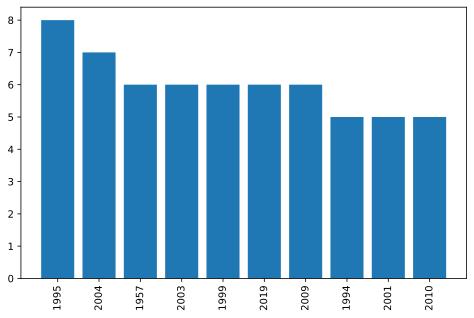

In [54]:
#Задача 4
from collections import Counter

counter = collections.Counter(data.year)
top_films_year = counter.most_common()

import numpy as np
import matplotlib.pyplot as plt

labels, ys = zip(*top_films_year[0:10])
xs = np.arange(len(labels))
width = 0.8

plt.bar(xs, ys, width, align = 'center')
plt.xticks(xs, labels, rotation='vertical')
plt.show()

<AxesSubplot:title={'center':'Rating_0.01'}, ylabel='Frequency'>

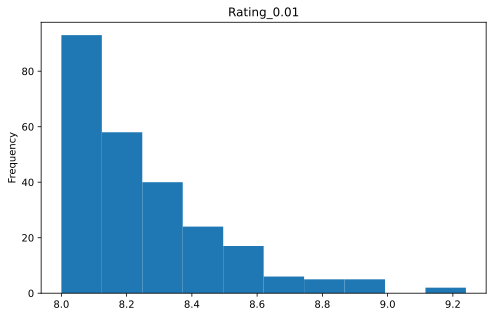

In [55]:
#Задача 5 Построить распределение топовых фильмов по рейтингу: 
#Округлить до сотых и отрисовать Округлить до десятых и отрисоватьОкруглить до целых и отрисовать

data1 = data

data1.ratings = pd.to_numeric(data1.ratings, errors='coerce')
data1.ratings=data1['ratings'].round(decimals = 2)


data1['ratings'].plot(kind='hist', title='Rating_0.01')


<AxesSubplot:title={'center':'Rating_0.1'}, ylabel='Frequency'>

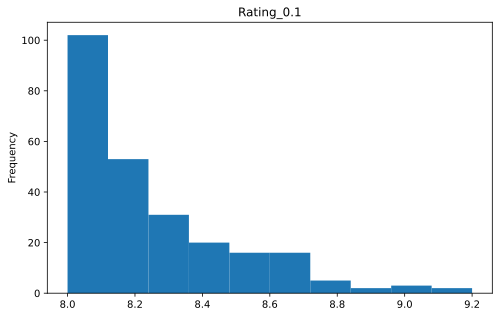

In [56]:
data2=data

data2.ratings = pd.to_numeric(data2.ratings, errors='coerce')
data2.ratings = data2['ratings'].round(decimals = 1)

data2['ratings'].plot(kind='hist', title='Rating_0.1')

<AxesSubplot:title={'center':'Rating_1'}, ylabel='Frequency'>

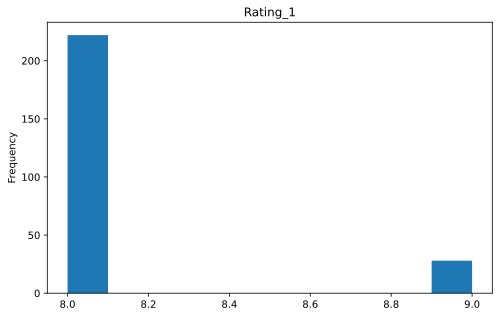

In [58]:
data3=data

data3.ratings = pd.to_numeric(data3.ratings, errors='coerce')
data3.ratings=data3['ratings'].round(decimals = 0)

data3['ratings'].plot(kind='hist', title='Rating_1')

In [ ]:
 film_url = 'http://www.imdb.com/title/tt0068646/'
 html_text = requests.get(film_url).text

In [ ]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find_all(attrs={"name": "description"})[0].get("content")

'The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluctant youngest son.'


Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 


Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов


Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)
